# Data Preprocessing

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the Data

In [174]:
df_train = pd.read_csv('train_data.csv')

C:\Users\alexr\AppData\Local\Temp\ipykernel_2944\2082349985.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train_data.csv')


Firstly we need to get a general idea of the data we are working with.

In [116]:
df_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [117]:
df_train.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


"WCIO Part Of Body Code" has a value of -9, which could be a mistake.

In [118]:
df_train_minus_9 = df_train[df_train['WCIO Part Of Body Code'] == -9]
df_train_minus_9['WCIO Part Of Body Description'].unique()

array(['MULTIPLE'], dtype=object)

This could be a value that was the result of a wrong input, it could possibly be 9 so lets check for that value.

In [119]:
df_train_9 = df_train[df_train['WCIO Part Of Body Code'] == 9]
df_train_9.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


What about 90?

In [120]:
df_train_90 = df_train[df_train['WCIO Part Of Body Code'] == 90]
df_train_90['WCIO Part Of Body Description'].unique()

array(['MULTIPLE BODY PARTS (INCLUDING BODY'], dtype=object)

Some of the values regarding age are unlikely, some external research helped conclude that the observations where the age of 0 (not included) to 3 can be removed

In [175]:
df_train = df_train[(df_train['Age at Injury'] == 0) | (df_train['Age at Injury'] >= 3)]

Lets look at data types and null values

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574024 entries, 0 to 593467
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570335 non-null  object 
 1   Age at Injury                       574024 non-null  float64
 2   Alternative Dispute Resolution      574024 non-null  object 
 3   Assembly Date                       574024 non-null  object 
 4   Attorney/Representative             574024 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544946 non-null  float64
 7   C-2 Date                            559464 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574024 non-null  object 
 10  Carrier Type                        574024 non-null  object 
 11  Claim Identifier               

We can see that in a couple of columns a lot of the values are null, lets check it out in detail

In [123]:
missing_values_count = df_train.isna().sum()
missing_values_percentage = df_train.isna().sum() / df_train.shape[0] * 100
missing_values_table = pd.DataFrame({'Missing Values Count': missing_values_count,'Missing Values Percentage': missing_values_percentage})
missing_values_table

,Missing Values Count,Missing Values Percentage
Accident Date,3689,0.642656
Age at Injury,0,0.000000
Alternative Dispute Resolution,0,0.000000
Assembly Date,0,0.000000
Attorney/Representative,0,0.000000
Average Weekly Wage,28650,4.991081
Birth Year,29078,5.065642
C-2 Date,14560,2.536479
C-3 Date,386779,67.380284
Carrier Name,0,0.000000


The variable "OIICS Nature of Injury Description" is completly empty, so we  will remove it.

There are also a high percentage of NA values in a lot of variables, to impute these columns would mean that most of the data had been created instead of collected, which could skew the data. The best course of action is to remove these columns. 

In [124]:
df_train = df_train.drop(columns=['OIICS Nature of Injury Description', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'])

In [125]:
len(df_train)

574024

In [126]:
df_train[df_train["Claim Identifier"].duplicated() == True]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


Lets check the data for duplicated rows

In [128]:
df_train[df_train.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


No duplicates.

Some of the variables have the wrong data type, such as date variables saved as objects and integer values saved as floats, will also fix this issue in order to obtain better visualizations. 

Lastly, for the EDA section we will remove NA's, later we can treat them correctly.

In [129]:
int_list = ['Age at Injury', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']
for i in int_list:
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

In [130]:
date_list = ['Accident Date', 'Assembly Date', 'C-2 Date']
for i in date_list:
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce')

# Visualization

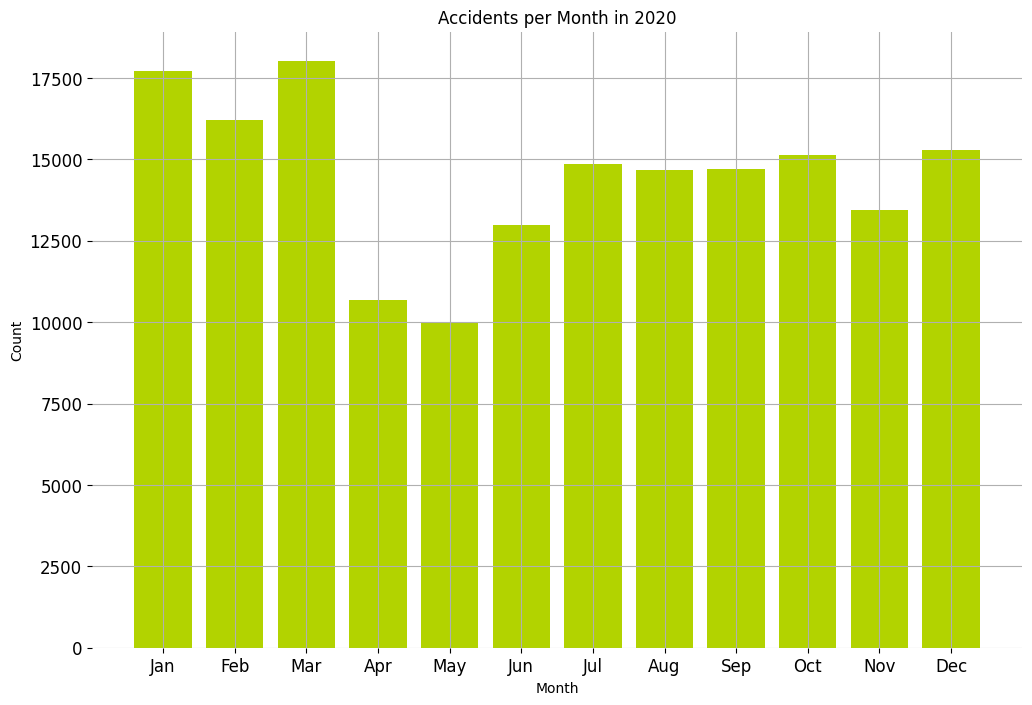

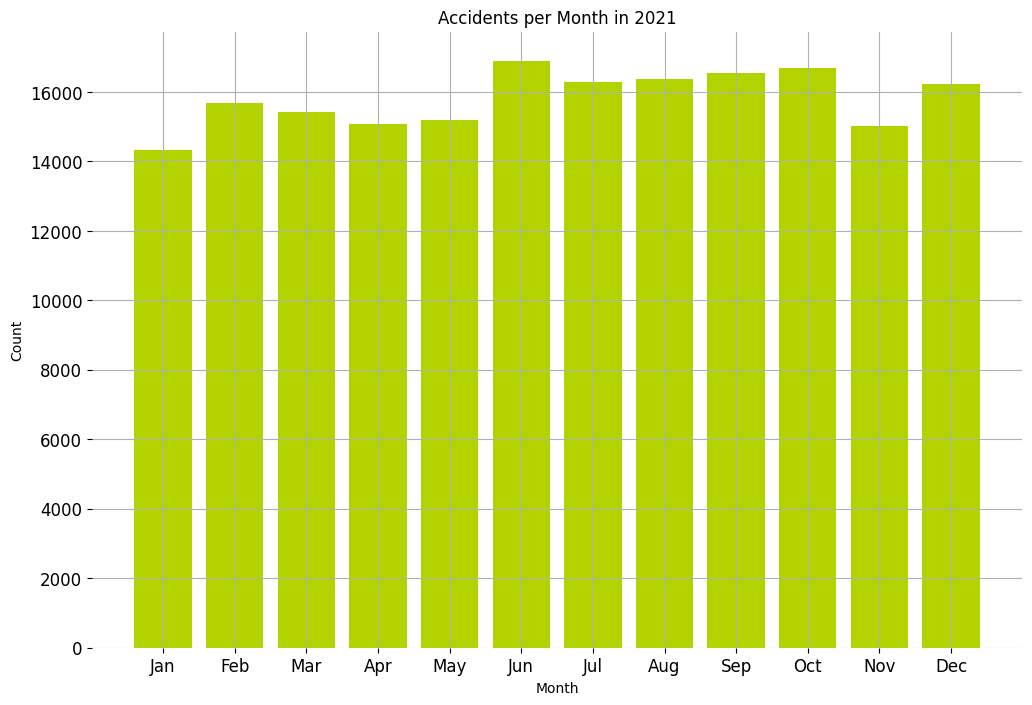

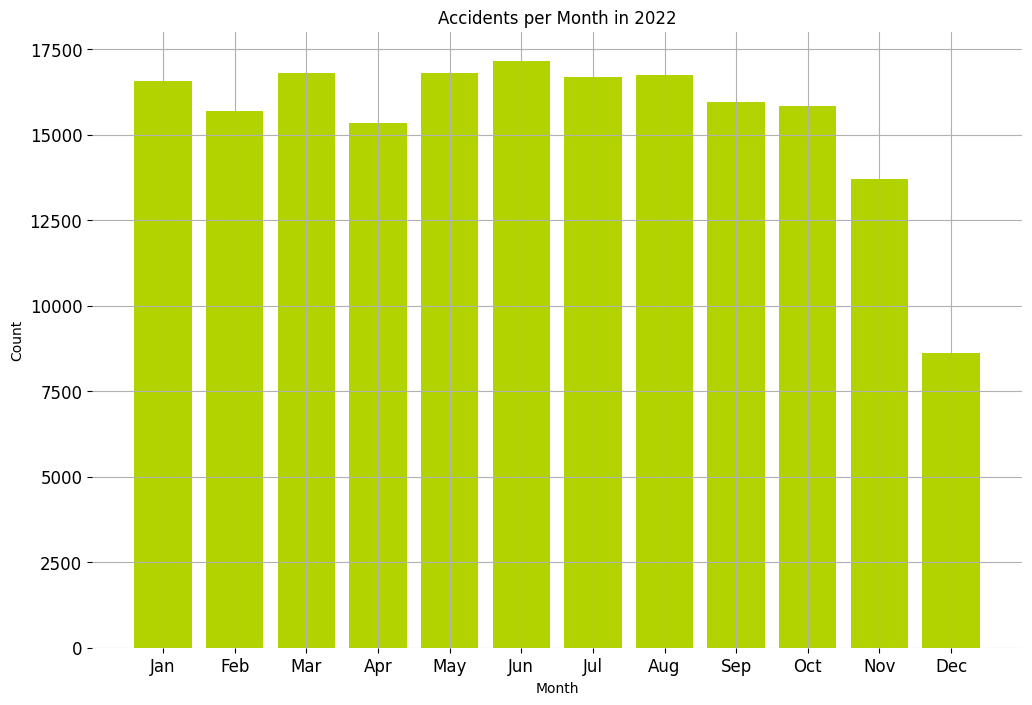

In [133]:
years_list = [2020, 2021, 2022]
for i in years_list:
    year_counts = df_train['Accident Date'][df_train['Accident Date'].dt.year == i].groupby(df_train['Accident Date'].dt.month).count()
    plt.figure(figsize=(12, 8))
    bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('Accidents per Month in ' + str(i))
    plt.yticks(fontsize=12)
    plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
    plt.grid(True)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

Lets take a look at how the accidents are distributed per month in all the years available

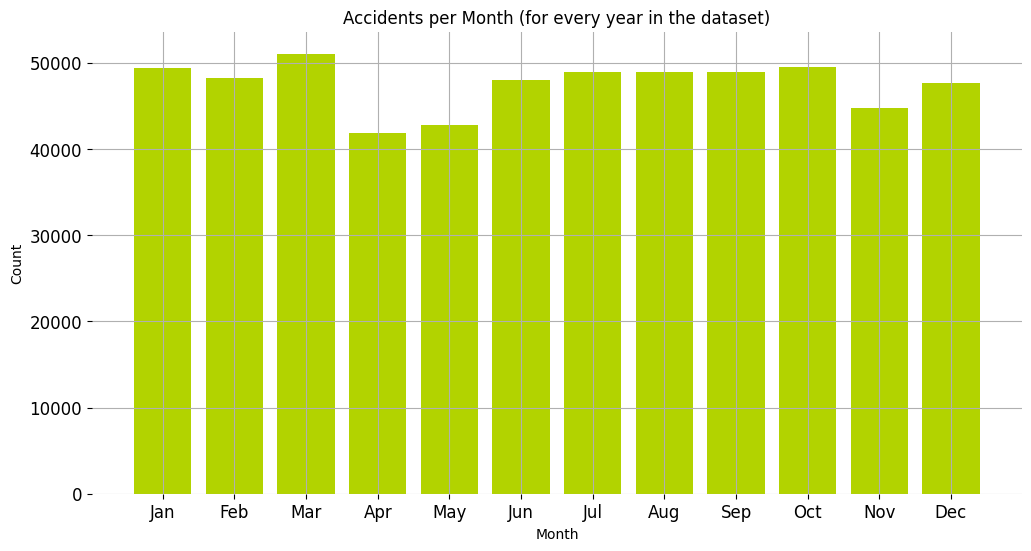

In [134]:
year_counts = df_train['Accident Date'].groupby(df_train['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (for every year in the dataset)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Now lets look at it only in the years of 2020, 2021 and 2022 (this is because these are the years with the most cases)

In [135]:
df_train_recent = df_train[df_train['Accident Date'].dt.year.isin([2020, 2021, 2022])]

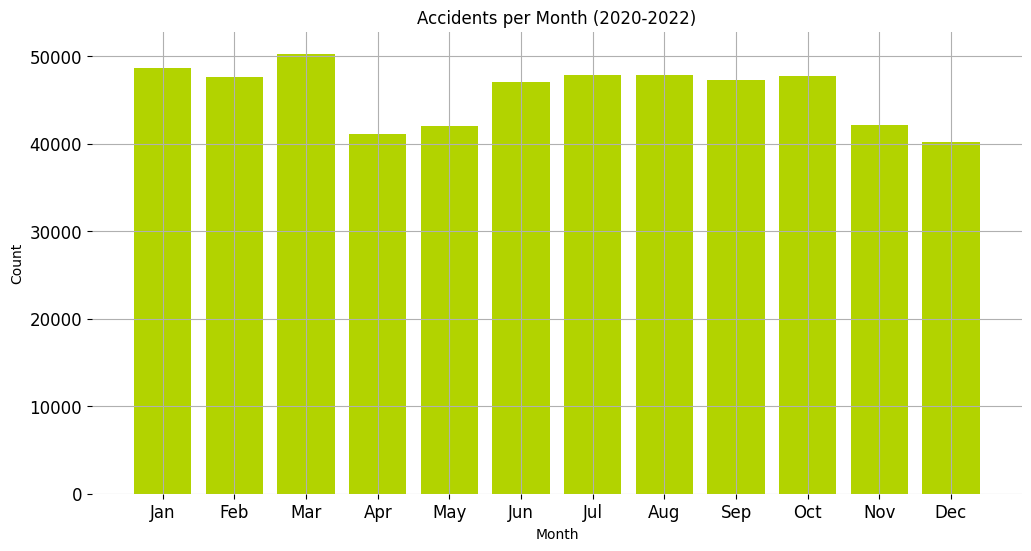

In [136]:
year_counts = df_train_recent['Accident Date'].groupby(df_train_recent['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (2020-2022)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Now lets look at it the other way around, what about the years before 2020, the minority subset

In [137]:
df_train_older = df_train[df_train['Accident Date'].dt.year < 2020]

In [138]:
df_train_older

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31,N,2020-01-01,N,0.00,1988.0,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,27,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,0,Not Work Related,1
1,2019-08-30,46,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,...,97,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,1,Not Work Related,4
2,2019-12-06,40,N,2020-01-01,N,1434.80,1979.0,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,...,79,OBJECT BEING LIFTED OR HANDLED,7,CONCUSSION,10,MULTIPLE HEAD INJURY,12589,0,Not Work Related,6
4,2019-12-30,61,N,2020-01-01,N,NaN,1958.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,...,16,"HAND TOOL, UTENSIL; NOT POWERED",43,PUNCTURE,36,FINGER(S),12603,0,Not Work Related,1
5,2019-12-26,67,N,2020-01-01,N,0.00,1952.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,...,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,38,SHOULDER(S),11772,0,Not Work Related,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592648,2019-09-06,109,N,2022-12-29,N,0.00,1910.0,2022-12-29,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,85,ANIMAL OR INSECT,43,PUNCTURE,32,ELBOW,11212,0,Not Work Related,0
592680,2019-09-03,20,N,2022-12-29,N,0.00,1999.0,2022-12-29,EVEREST NATIONAL INS COMPANY,1A. PRIVATE,...,99,"OTHER - MISCELLANEOUS, NOC",59,"ALL OTHER SPECIFIC INJURIES, NOC",16,TEETH,11717,0,Not Work Related,6
593136,1980-05-17,45,N,2022-12-30,N,0.00,1935.0,2022-12-30,INFINITY ASSURANCE INS. CO.,1A. PRIVATE,...,29,ON SAME LEVEL,52,STRAIN OR TEAR,42,LOWER BACK AREA,11766,0,Not Work Related,1
593212,2019-07-05,21,N,2022-12-30,N,0.00,1998.0,2022-12-30,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,16,"HAND TOOL, UTENSIL; NOT POWERED",40,LACERATION,34,WRIST,11706,0,Not Work Related,5


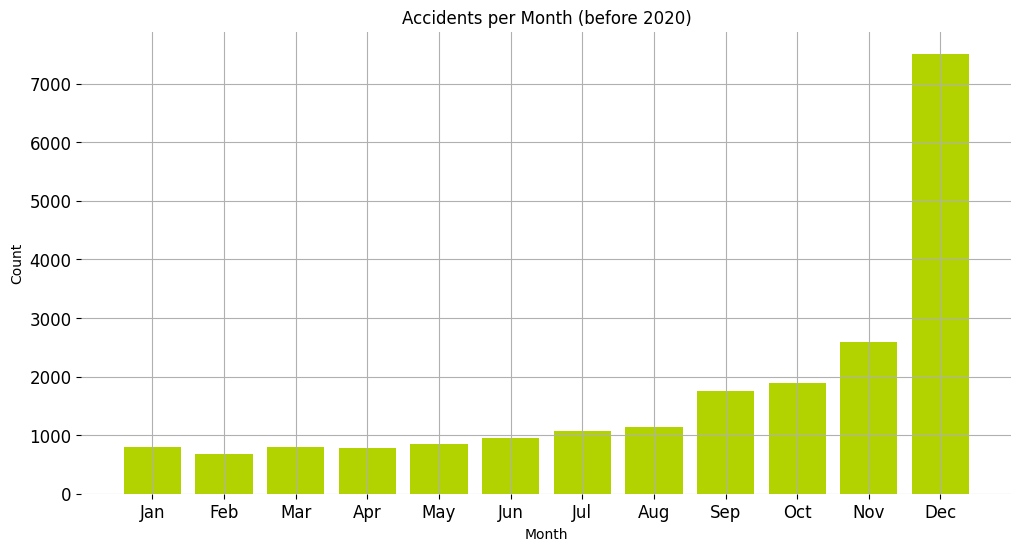

In [139]:
year_counts = df_train_older['Accident Date'].groupby(df_train_older['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (before 2020)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

How are the types of claim distributed in this dataset?

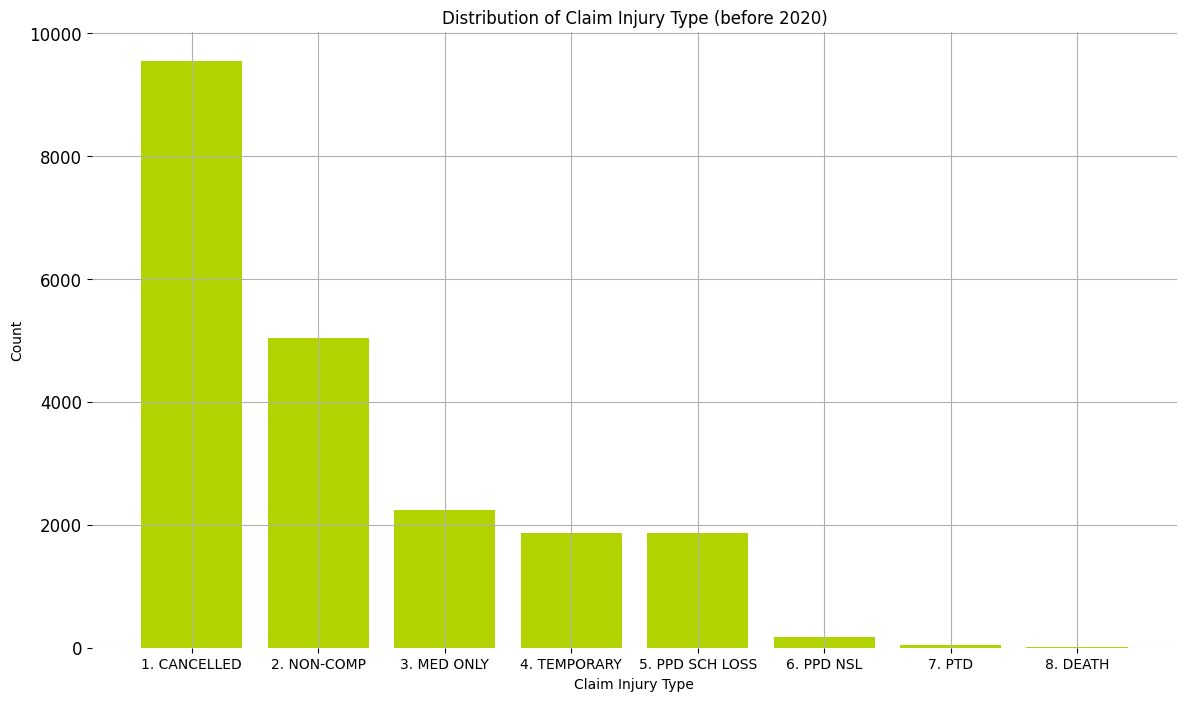

In [178]:
claim_injury_counts = df_train_older['Claim Injury Type'].value_counts()
plt.figure(figsize=(14, 8))
bars = plt.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type (before 2020)')
plt.yticks(fontsize=12)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The presence of a lawyer can sometimes change the outcome of a insurance claim, lets see how that presence is distributed by the types of claims

In [141]:
df_train['Claim Injury Type'].unique()

array(['2. NON-COMP', '4. TEMPORARY', '3. MED ONLY', '5. PPD SCH LOSS',
       '6. PPD NSL', '1. CANCELLED', '8. DEATH', '7. PTD'], dtype=object)

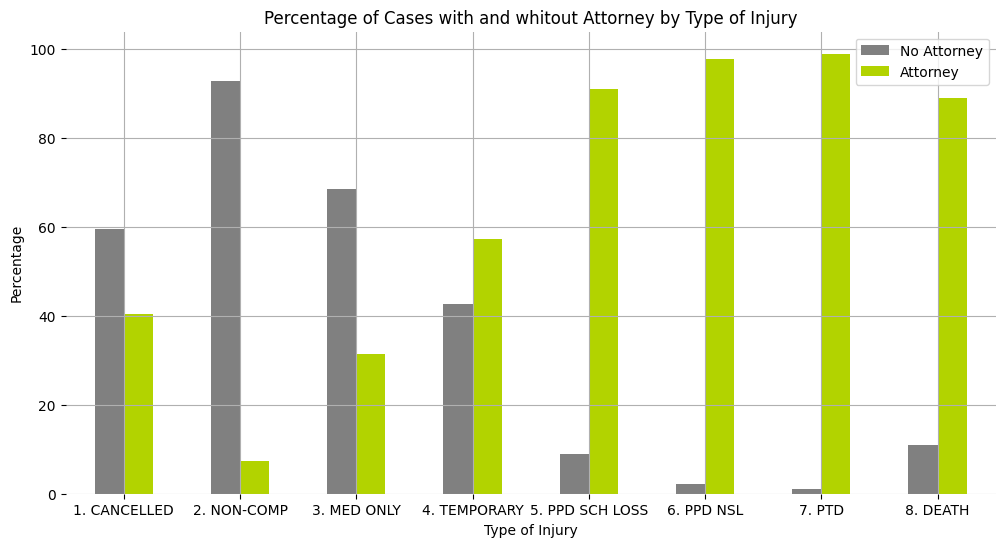

In [179]:
claim_injury_by_attorney = pd.crosstab(df_train['Claim Injury Type'], df_train['Attorney/Representative'])
claim_injury_by_attorney.columns = ['No Attorney', 'Attorney']
claim_injury_by_attorney.reset_index(inplace=True)
claim_injury_by_attorney['Attorney'] = claim_injury_by_attorney['Attorney'] / (claim_injury_by_attorney['No Attorney'] + claim_injury_by_attorney['Attorney']) * 100
claim_injury_by_attorney['No Attorney'] = 100 - claim_injury_by_attorney['Attorney']
claim_injury_by_attorney
claim_injury_by_attorney.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Attorney by Type of Injury')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()


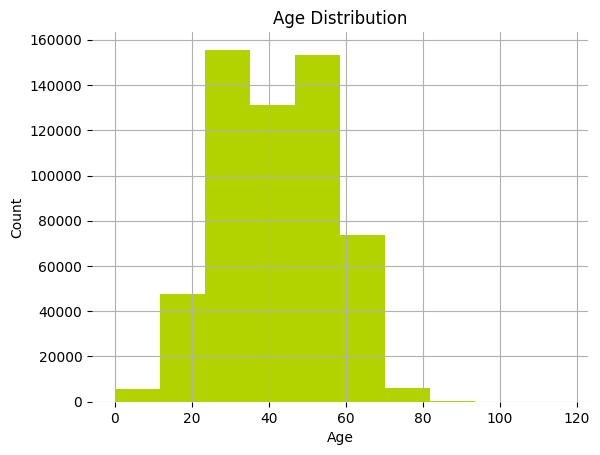

In [143]:
plt.hist(df_train['Age at Injury'], color='#B2D300')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

This histogram isn't really interesting, instead we will create bins and check how the accidents are distributed throught the different age groups

In [144]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
df_train['age_group'] = pd.cut(df_train['Age at Injury'], bins=bins)

In [145]:
age_group_counts = df_train['age_group'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table['Age Group'] = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
age_group_table

,Age Group,Count,Percentage
0,0-10,18,0.003166
1,10-20,19056,3.351944
2,20-30,116489,20.490373
3,30-40,129612,22.798704
4,40-50,118033,20.761962
5,50-60,127283,22.389034
6,60-70,51167,9.000257
7,70-80,6111,1.074923
8,80-90,625,0.109937
9,90-100,112,0.019701


In [146]:
df_zeros = df_train[df_train['Age at Injury'] == 0]
df_zeros.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,Claim Identifier,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,1775,5464.0,5464,5169.000000,5204.000000,3081,5.464000e+03,3983.0,2940.0,2937.0,2535.0,5464.0,5464.0
mean,2018-05-30 02:25:13.014084608,0.0,2021-05-19 05:29:57.364568064,70.099559,1238.161414,2021-06-11 06:30:15.774099712,5.734683e+06,50.708009,74.727891,53.292475,37.280473,0.068814,2.999817
min,1967-04-05 00:00:00,0.0,2020-01-02 00:00:00,0.000000,0.000000,1997-02-07 00:00:00,5.393794e+06,11.0,1.0,1.0,-9.0,0.0,0.0
25%,2020-01-07 00:00:00,0.0,2020-08-21 00:00:00,0.000000,0.000000,2020-10-08 00:00:00,5.541794e+06,42.0,56.0,37.0,13.0,0.0,1.0
50%,2020-09-29 00:00:00,0.0,2021-04-27 00:00:00,0.000000,1959.000000,2021-07-16 00:00:00,5.708605e+06,48.0,83.0,52.0,35.0,0.0,3.0
75%,2021-09-16 00:00:00,0.0,2022-02-03 00:00:00,0.000000,1967.000000,2022-05-03 00:00:00,5.912161e+06,62.0,98.0,72.0,53.0,0.0,5.0
max,2022-12-20 00:00:00,0.0,2022-12-30 00:00:00,5867.580000,2005.000000,2024-05-31 00:00:00,6.165637e+06,92.0,99.0,91.0,99.0,1.0,6.0
std,NaN,0.0,NaN,321.922818,949.243284,NaN,2.187567e+05,18.743996,27.188004,22.075821,26.238942,0.253161,1.980733


Most observations with 0 years of age dont have an "average weekly wage" and a sizable amount have 0 as their birth year.
For the ones who have a birth year, it is possible to calculate their age at the time of teh accident, this is something to be done in the data cleaning section.

Lets check how the dataset is distributed in terms of gender

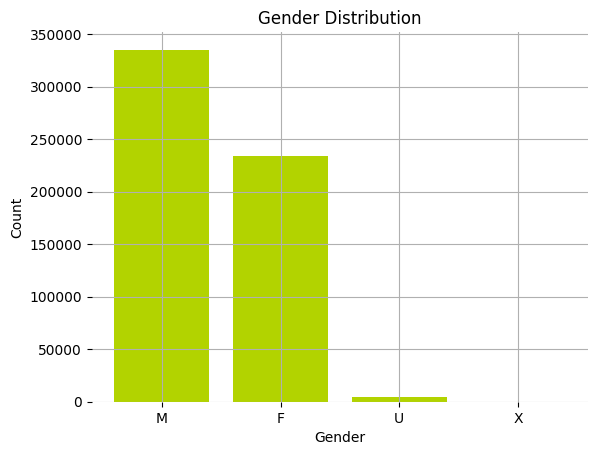

In [147]:
df_train['Gender'] = df_train['Gender'].astype(str)
gender_counts = df_train['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='#B2D300')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [148]:
gender_type_of_claim = pd.crosstab(df_train['Gender'], df_train['Claim Injury Type'])
for i in gender_type_of_claim.columns:
    gender_type_of_claim[i] = (gender_type_of_claim[i] / gender_type_of_claim[i].sum()) * 100
gender_type_of_claim

Claim Injury Type,1. CANCELLED,2. NON-COMP,3. MED ONLY,4. TEMPORARY,5. PPD SCH LOSS,6. PPD NSL,7. PTD,8. DEATH
Gender,,,,,,,,
F,33.429510,44.401119,40.794706,37.794851,30.292046,40.156732,23.71134,12.765957
M,65.167909,54.539364,58.523206,61.647599,69.320630,59.534552,76.28866,87.234043
U,1.378537,1.055394,0.655966,0.554183,0.370754,0.308715,0.00000,0.000000
X,0.024044,0.004123,0.026123,0.003367,0.016570,0.000000,0.00000,0.000000


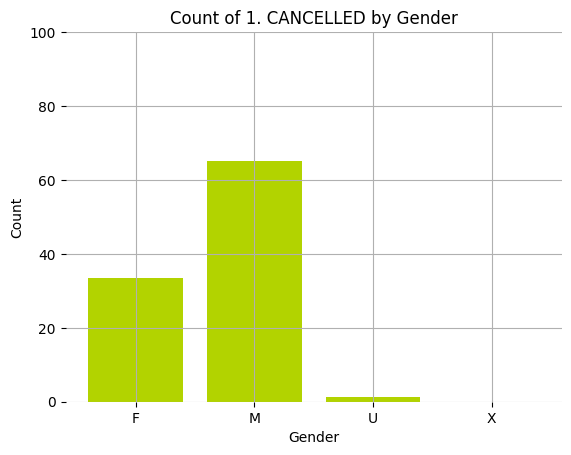

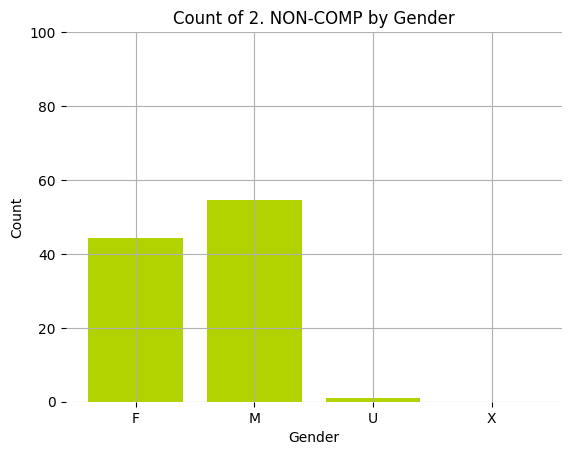

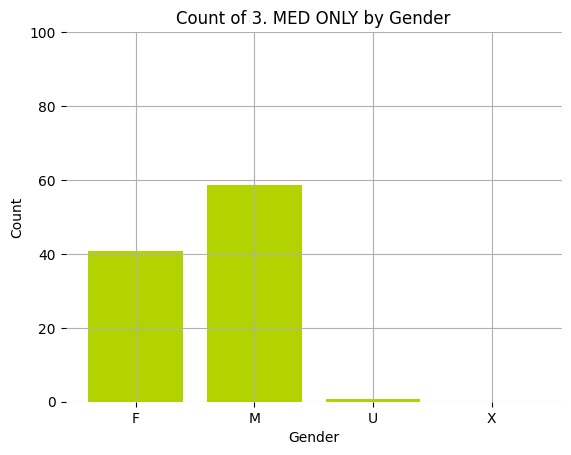

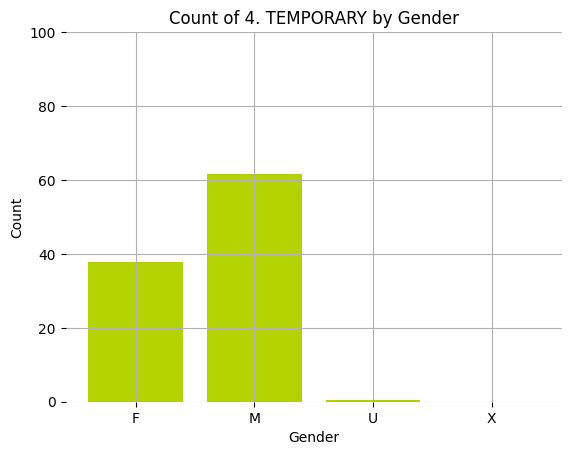

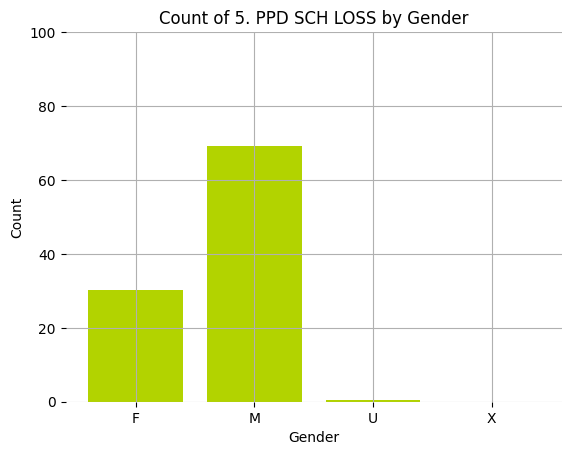

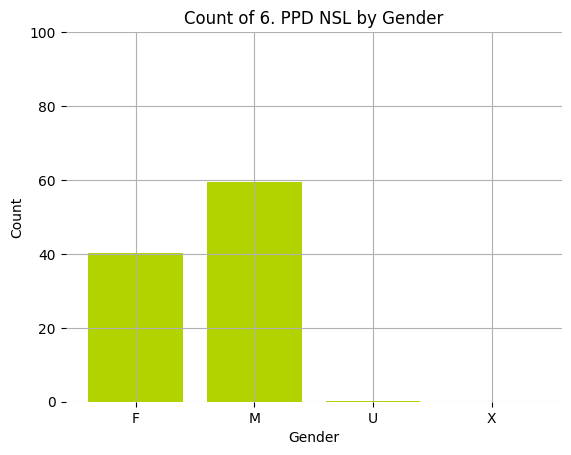

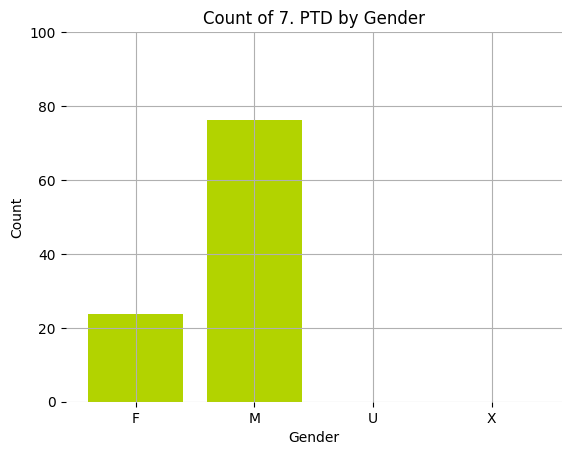

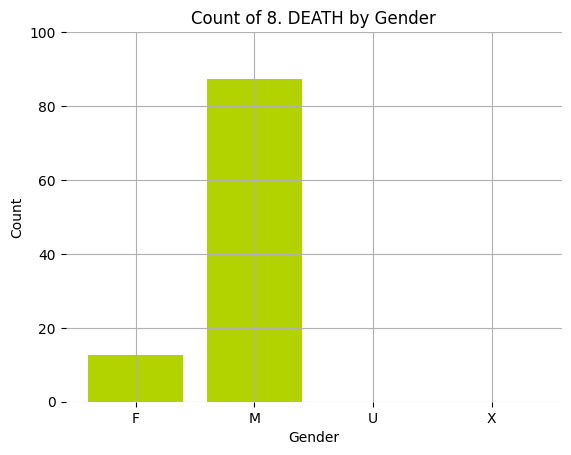

In [149]:
for col in gender_type_of_claim.columns:
    plt.bar(gender_type_of_claim.index, gender_type_of_claim[col], color='#B2D300')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title(f'Count of {col} by Gender')
    plt.grid(True)
    plt.ylim(0, 100)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

Two columns seem to be unbalanced lets take a look

In [150]:
covid_count = df_train['COVID-19 Indicator'].value_counts()
covid_count_percent = covid_count / covid_count.sum() * 100
decision_count = df_train['WCB Decision'].value_counts()
decision_count_percent = decision_count / decision_count.sum() * 100
print(covid_count_percent)
print(decision_count_percent)

COVID-19 Indicator
N    95.205601
Y     4.794399
Name: count, dtype: float64
WCB Decision
Not Work Related    100.0
Name: count, dtype: float64


The "COVID-19 Indicator" is composed by (roughly) 95% of cases where the claimant did **not** have covid and 5% where the claimant had **covid**. This variable is highly unbalanced, which could mean its prediction power is very low. Further research is necessary to understand the utility of this variable.

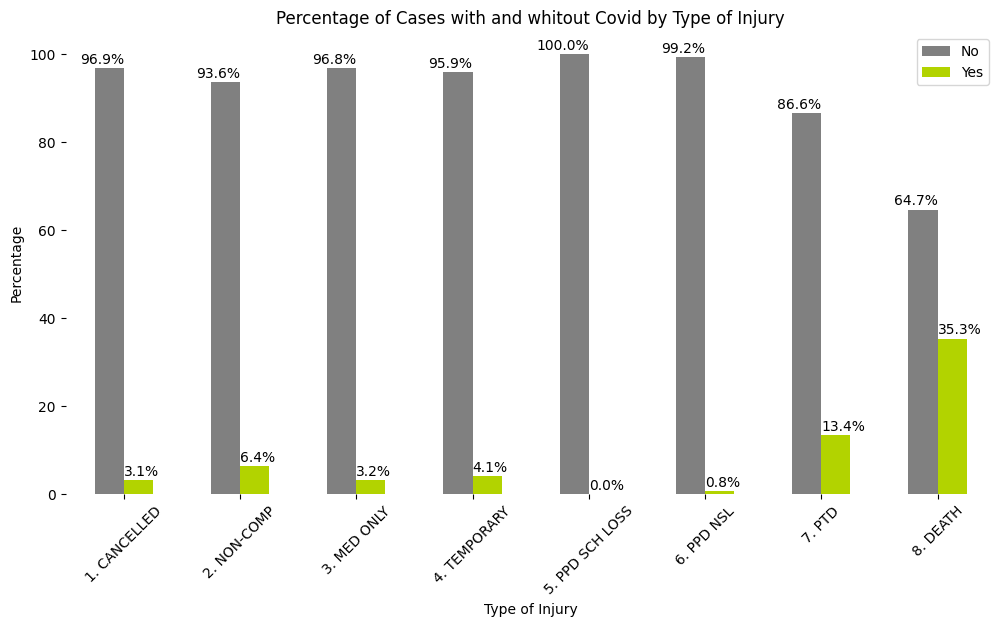

In [151]:
claim_injury_covid = pd.crosstab(df_train['Claim Injury Type'], df_train['COVID-19 Indicator'])
claim_injury_covid.columns = ['No', 'Yes']
claim_injury_covid.reset_index(inplace=True)
claim_injury_covid['Yes'] = claim_injury_covid['Yes'] / (claim_injury_covid['No'] + claim_injury_covid['Yes']) * 100
claim_injury_covid['No'] = 100 - claim_injury_covid['Yes']
claim_injury_covid
claim_injury_covid.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Covid by Type of Injury')
for index, value in enumerate(claim_injury_covid['Yes']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='left', fontsize=10)
for index, value in enumerate(claim_injury_covid['No']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='right', fontsize=10)
plt.xticks(ticks=claim_injury_covid.index, labels=claim_injury_covid['Claim Injury Type'], rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

We can observe that the cases where the injury type is "DEATH" have a much higher rate of covid. There could possibly be a correlation between these variables, so at this time the Covid variable will be kept.

"WCB Decision" is composed in its entirety by "Not Work Related" cases, this variable shows no variability and therefore it is not a variable of interest, for the sake of simplicity we will remove it.

In [152]:
df_train = df_train.drop(columns=['WCB Decision'])

What about the states where the accidents happened?

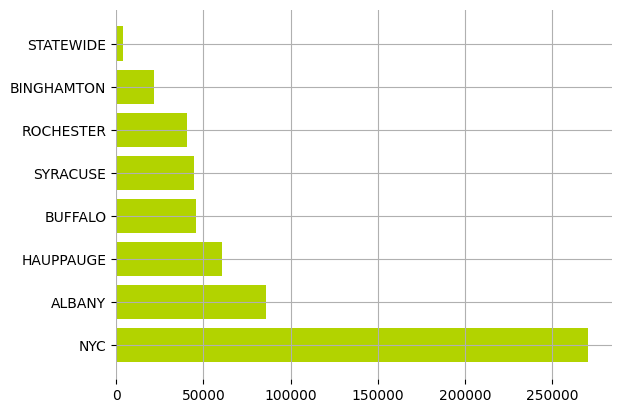

In [153]:
district_counts = df_train['District Name'].value_counts()
plt.barh(district_counts.index, district_counts.values, color='#B2D300')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Most cases happen in the region of NYC (New York City, which accounts for 5 counties) this could be due to its higher population count.

(https://worldpopulationreview.com/us-counties/new-york)

Lets take a look at how our target variable behaves in these communities

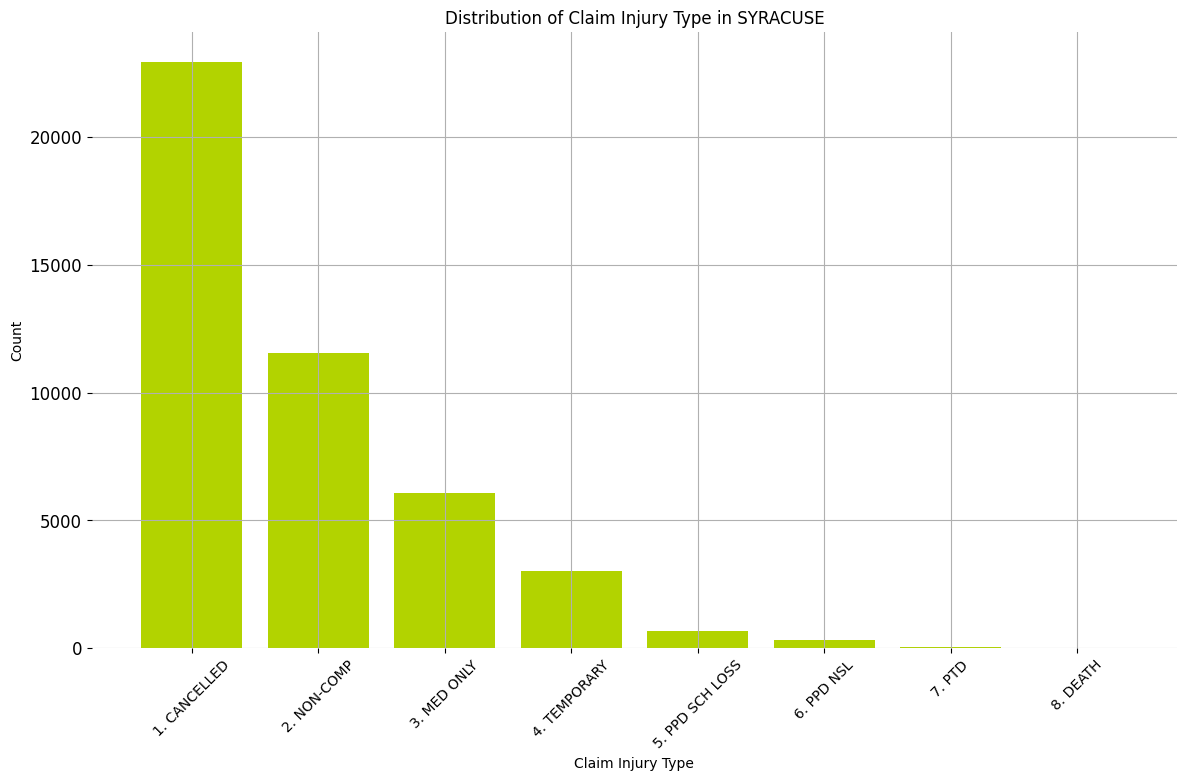

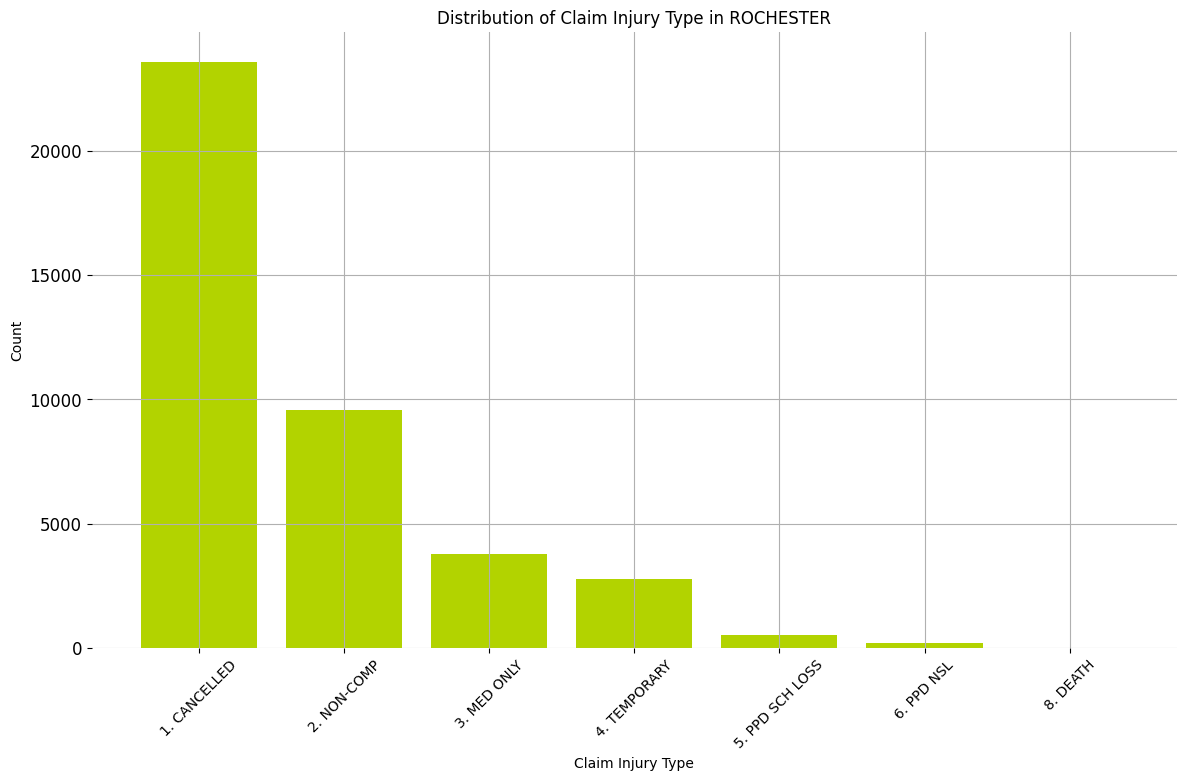

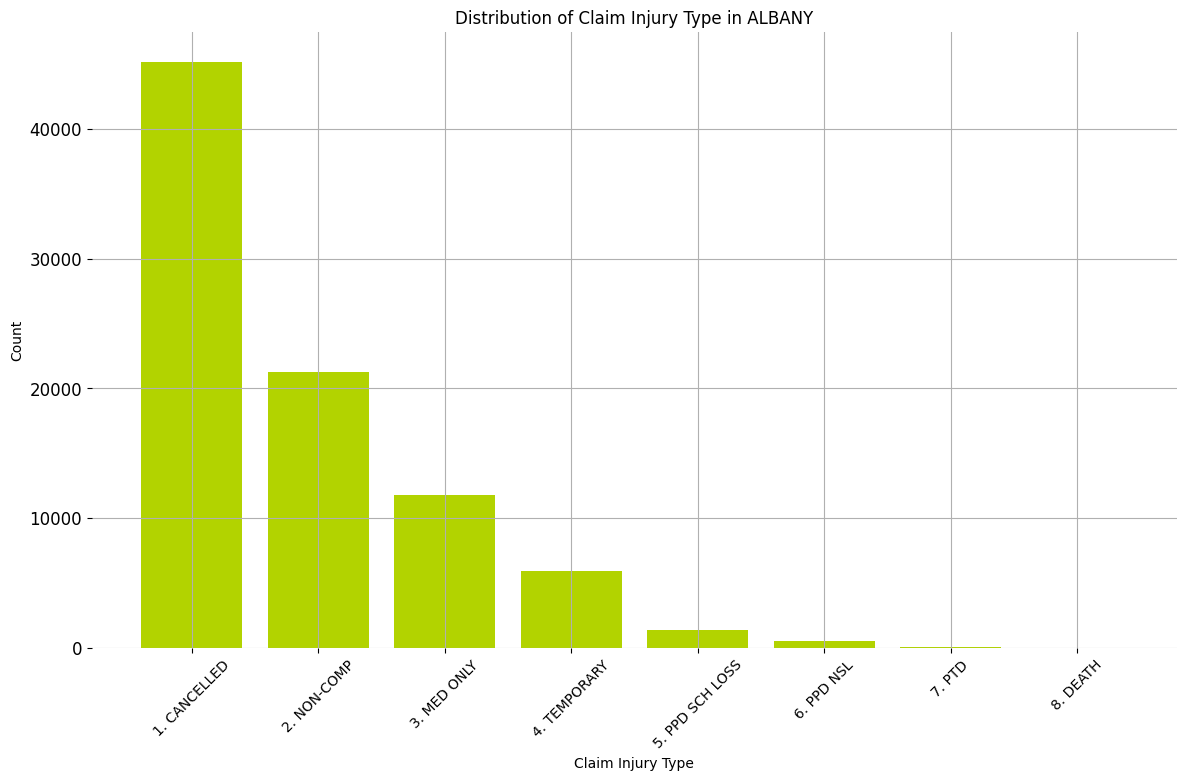

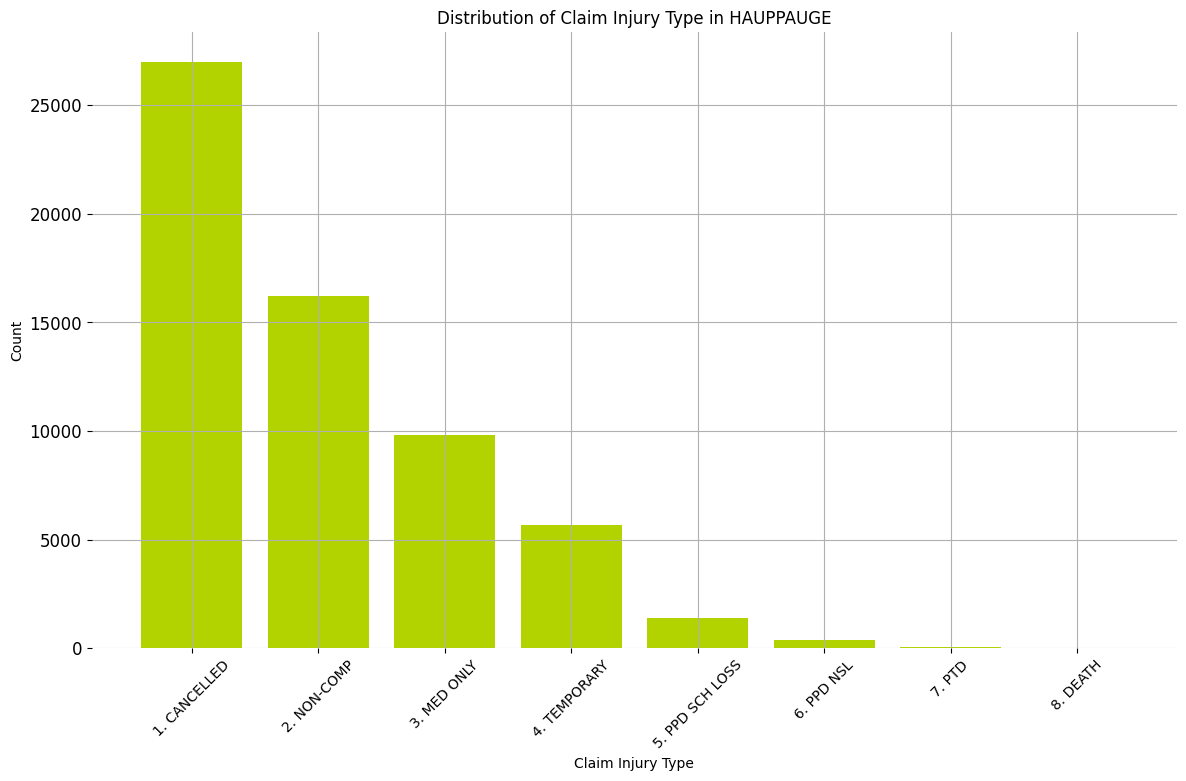

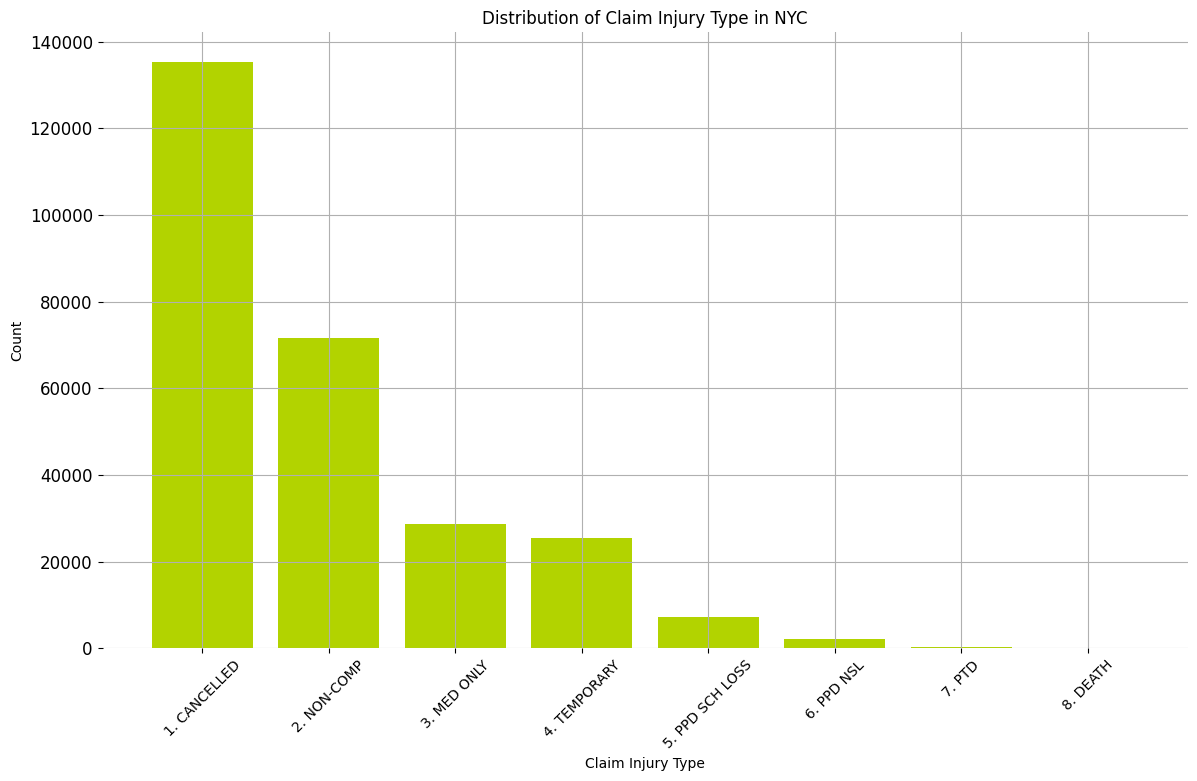

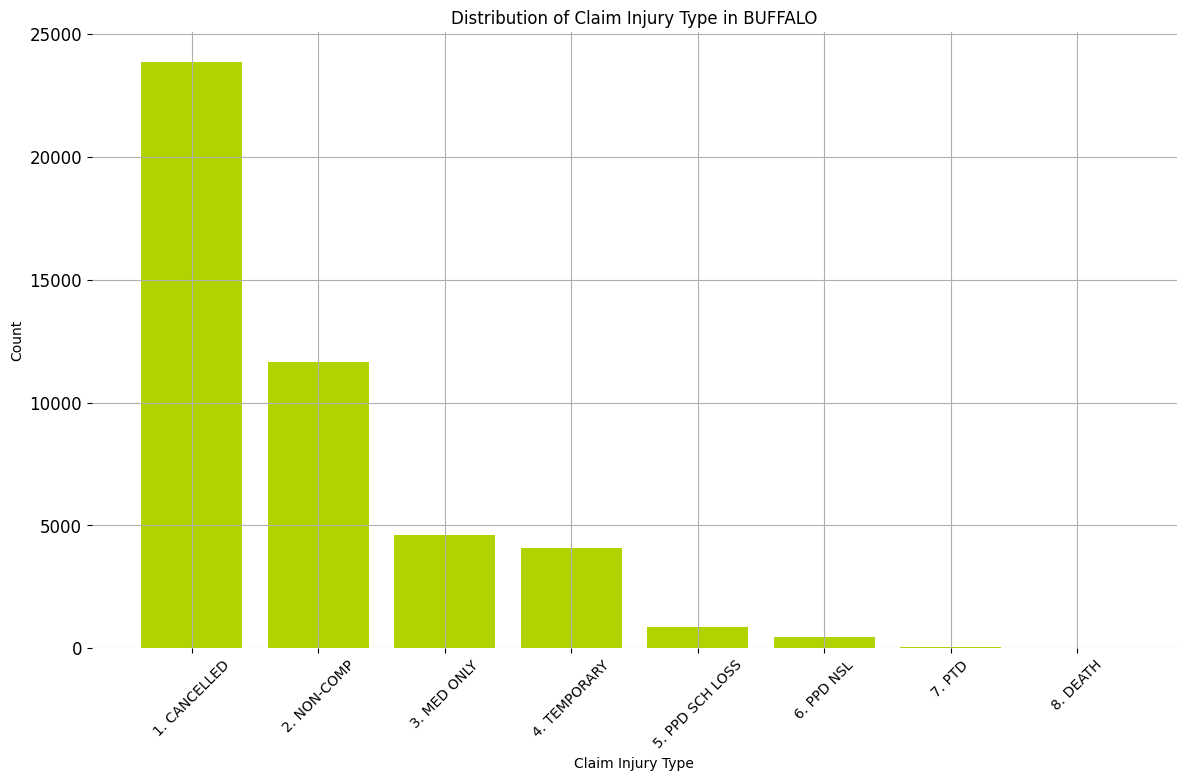

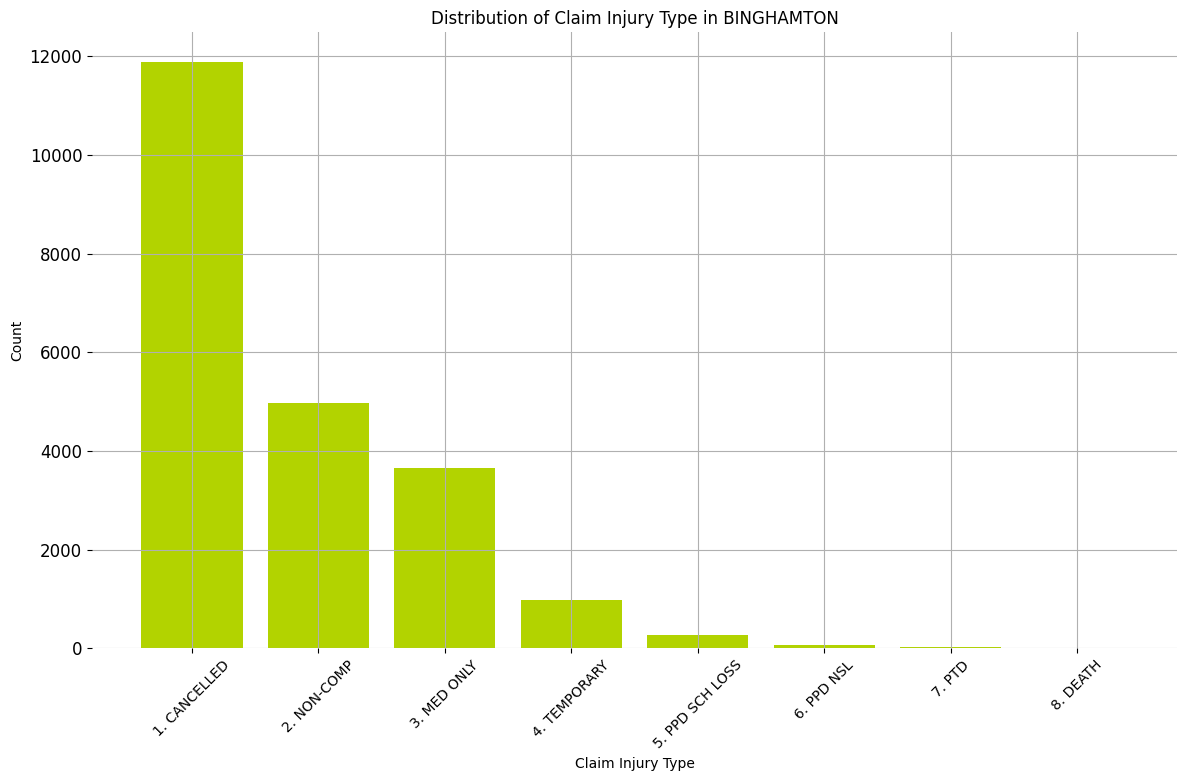

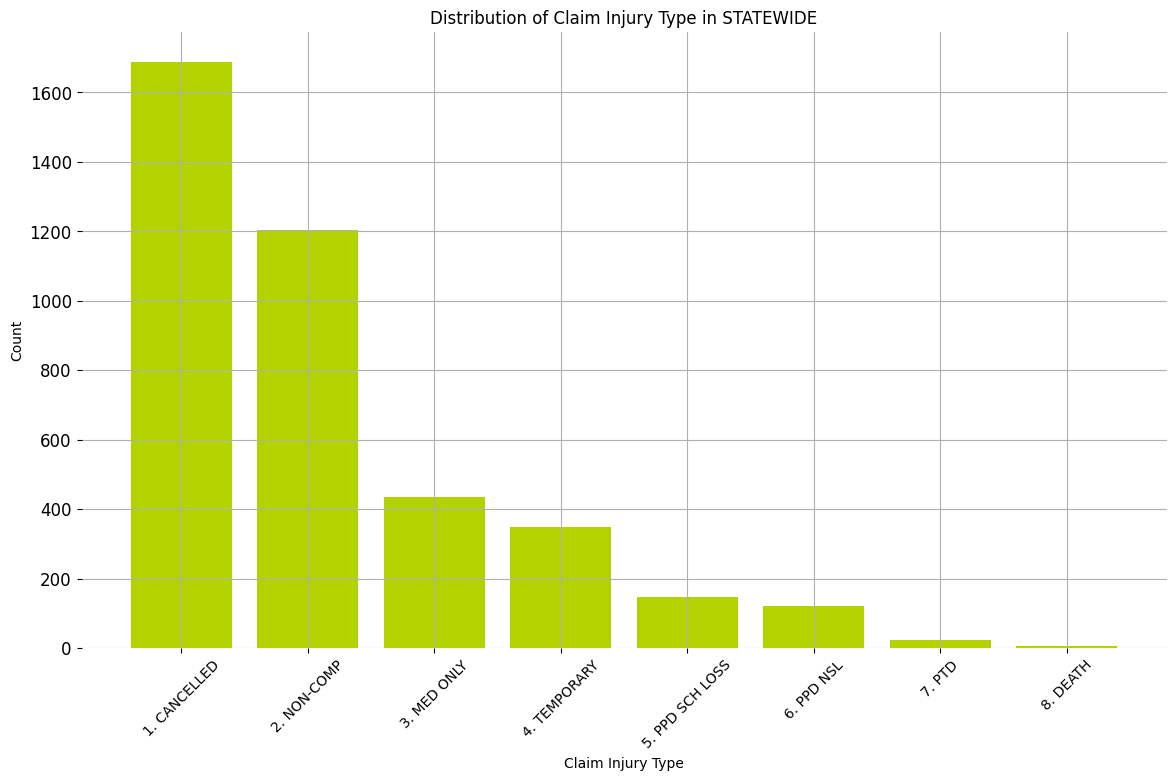

In [154]:
places = df_train['District Name'].unique()

for i in places:
    df_train
    claim_injury_counts = df_train[df_train['District Name'] == i]['Claim Injury Type'].value_counts()
    plt.figure(figsize=(14, 8))
    bars = plt.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
    plt.xlabel('Claim Injury Type')
    plt.ylabel('Count')
    plt.title(f'Distribution of Claim Injury Type in {i}')
    plt.yticks(fontsize=12)
    plt.grid(True)
    ax = plt.gca()
    plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

In [155]:
bins = (0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 1000000)
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins)

In [156]:
age_group_counts = df_train['wage_groups'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table['Age Group'] = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-10000', '10000-20000', '20000-30000', '30000-40000',
                                 '40000-50000', '50000-100000', '100000-200000', '200000-300000', '300000-400000', '400000-500000', '500000-1000000']
age_group_table

,Age Group,Count,Percentage
0,0-1000,96645,46.038967
1,1000-2000,87274,41.574886
2,2000-3000,20881,9.947123
3,3000-4000,3763,1.792588
4,4000-5000,973,0.463510
5,5000-10000,328,0.156250
6,10000-20000,29,0.013815
7,20000-30000,9,0.004287
8,30000-40000,2,0.000953
9,40000-50000,2,0.000953


We can see that roughly 86% of our data falls in the range of 0 to 2000 monetary units. Lets look further into this range and see if we find anything interesting

In [157]:
df_train1 = df_train[df_train['Average Weekly Wage'] < 3000]
bins = (0, 500, 1000, 1500, 2000, 2500, 3000)
df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)

C:\Users\alexr\AppData\Local\Temp\ipykernel_2944\1944115288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)


In [158]:
df_train1['Average Weekly Wage'].mean()

np.float64(437.4043178023361)

In [159]:
df_testing = df_train1[df_train1['Average Weekly Wage'] == 0]

In [160]:
df_testing

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,age_group,wage_groups
0,2019-12-30,31,N,2020-01-01,N,0.0,1988.0,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,0,1,"(30, 40]",NaN
5,2019-12-26,67,N,2020-01-01,N,0.0,1952.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,...,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,38,SHOULDER(S),11772,0,5,"(60, 70]",NaN
6,2019-12-28,48,N,2020-01-01,N,0.0,1971.0,2019-12-31,LM INSURANCE CORP,1A. PRIVATE,...,"CUT, PUNCTURE, SCRAPE, NOC",40,LACERATION,36,FINGER(S),13029,0,1,"(40, 50]",NaN
7,2019-12-30,33,N,2020-01-01,N,0.0,1986.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,...,"OTHER - MISCELLANEOUS, NOC",71,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38,SHOULDER(S),10305,0,6,"(30, 40]",NaN
8,2019-12-23,55,N,2020-01-01,N,0.0,1964.0,2020-01-01,"ROCHESTER, UNIVERSITY OF",4A. SELF PRIVATE,...,"OTHER - MISCELLANEOUS, NOC",59,"ALL OTHER SPECIFIC INJURIES, NOC",60,LUNGS,14620,0,6,"(50, 60]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593450,2022-12-28,29,N,2022-12-30,N,0.0,NaN,2022-12-30,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,"STRUCK OR INJURED, NOC",13,CRUSHING,35,HAND,10453,0,1,"(20, 30]",NaN
593451,2022-12-14,35,N,2022-12-30,N,0.0,1987.0,2022-12-30,STATE INSURANCE FUND,2A. SIF,...,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10,CONTUSION,42,LOWER BACK AREA,10467,0,4,"(30, 40]",NaN
593455,2022-12-15,33,N,2022-12-31,N,0.0,1989.0,2022-12-31,WESCO INSURANCE CO,1A. PRIVATE,...,"FELLOW WORKER, PATIENT OR OTHER PERSON",37,INFLAMMATION,35,HAND,11590,0,6,"(30, 40]",NaN
593457,2022-12-14,24,N,2022-12-31,N,0.0,1998.0,2022-12-31,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,...,USING TOOL OR MACHINERY,59,"ALL OTHER SPECIFIC INJURIES, NOC",55,ANKLE,10029,0,5,"(20, 30]",NaN


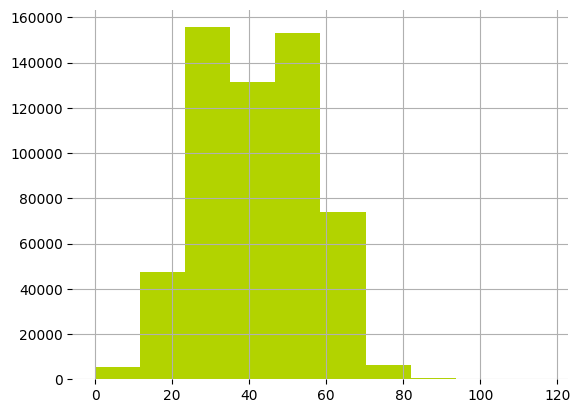

In [190]:
plt.hist(df_train['Age at Injury'], color='#B2D300')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

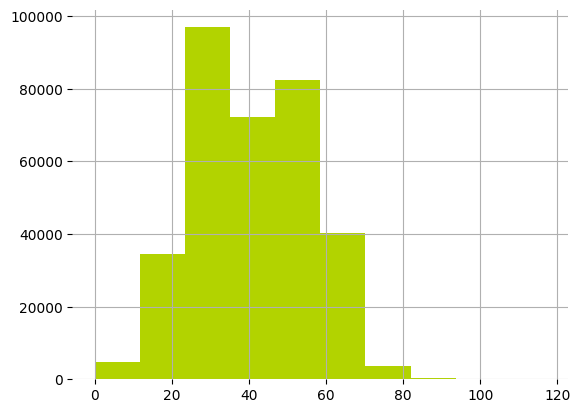

In [189]:
plt.hist(df_testing['Age at Injury'], color='#B2D300')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

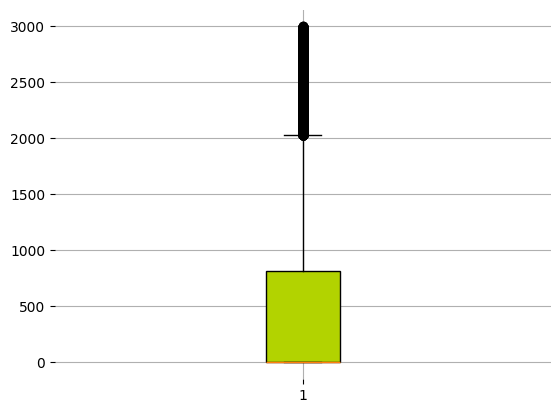

In [188]:
plt.boxplot(df_train1['Average Weekly Wage'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

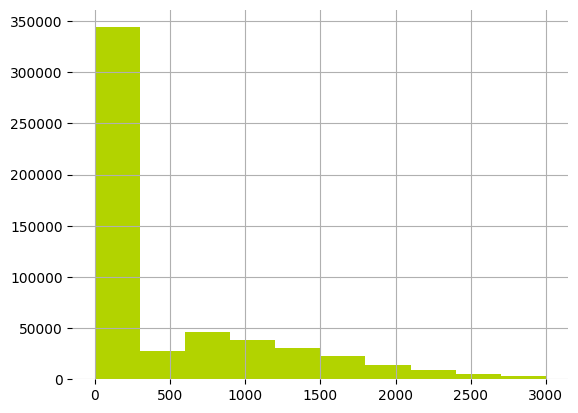

In [185]:
plt.hist(df_train1['Average Weekly Wage'], color='#B2D300')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

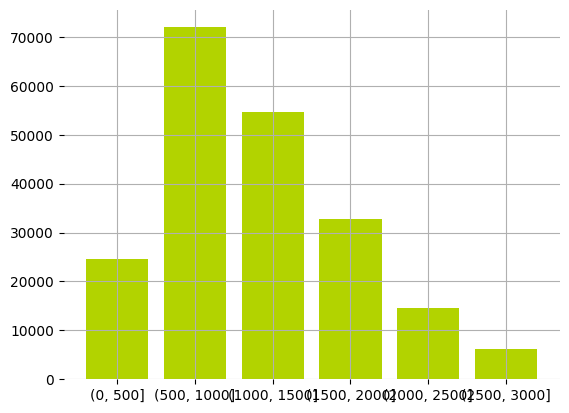

In [184]:
wage_groups_counts = df_train1['wage_groups'].value_counts().sort_index()
plt.bar(wage_groups_counts.index.astype(str), wage_groups_counts.values, color='#B2D300')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [168]:
age_group_counts = df_train1['wage_groups'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table

,Age Group,Count,Percentage
0,"(0, 500]",24689,12.057472
1,"(500, 1000]",71956,35.141458
2,"(1000, 1500]",54601,26.665722
3,"(1500, 2000]",32673,15.956652
4,"(2000, 2500]",14666,7.162497
5,"(2500, 3000]",6176,3.016199


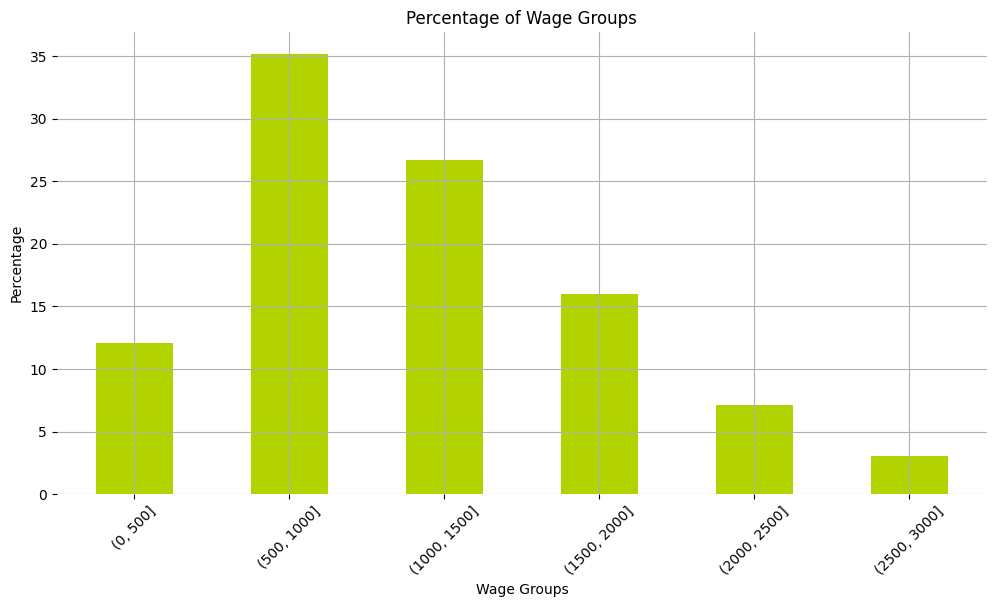

In [169]:
age_group_counts_percentage.plot(kind='bar', color='#B2D300', figsize=(12, 6))
plt.xlabel('Wage Groups')
plt.ylabel('Percentage')
plt.title('Percentage of Wage Groups')
plt.xticks(rotation=45)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [170]:
df_train

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,age_group,wage_groups
0,2019-12-30,31,N,2020-01-01,N,0.00,1988.0,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,0,1,"(30, 40]",NaN
1,2019-08-30,46,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,...,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,1,4,"(40, 50]","(1000.0, 2000.0]"
2,2019-12-06,40,N,2020-01-01,N,1434.80,1979.0,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,...,OBJECT BEING LIFTED OR HANDLED,7,CONCUSSION,10,MULTIPLE HEAD INJURY,12589,0,6,"(30, 40]","(1000.0, 2000.0]"
4,2019-12-30,61,N,2020-01-01,N,NaN,1958.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,...,"HAND TOOL, UTENSIL; NOT POWERED",43,PUNCTURE,36,FINGER(S),12603,0,1,"(60, 70]",NaN
5,2019-12-26,67,N,2020-01-01,N,0.00,1952.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,...,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,38,SHOULDER(S),11772,0,5,"(60, 70]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593451,2022-12-14,35,N,2022-12-30,N,0.00,1987.0,2022-12-30,STATE INSURANCE FUND,2A. SIF,...,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10,CONTUSION,42,LOWER BACK AREA,10467,0,4,"(30, 40]",NaN
593455,2022-12-15,33,N,2022-12-31,N,0.00,1989.0,2022-12-31,WESCO INSURANCE CO,1A. PRIVATE,...,"FELLOW WORKER, PATIENT OR OTHER PERSON",37,INFLAMMATION,35,HAND,11590,0,6,"(30, 40]",NaN
593456,2022-12-13,61,N,2022-12-31,N,991.08,1961.0,2022-12-31,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,...,"CUMULATIVE, NOC",80,"ALL OTHER CUMULATIVE INJURY, NOC",34,WRIST,14227,0,3,"(60, 70]","(0.0, 1000.0]"
593457,2022-12-14,24,N,2022-12-31,N,0.00,1998.0,2022-12-31,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,...,USING TOOL OR MACHINERY,59,"ALL OTHER SPECIFIC INJURIES, NOC",55,ANKLE,10029,0,5,"(20, 30]",NaN


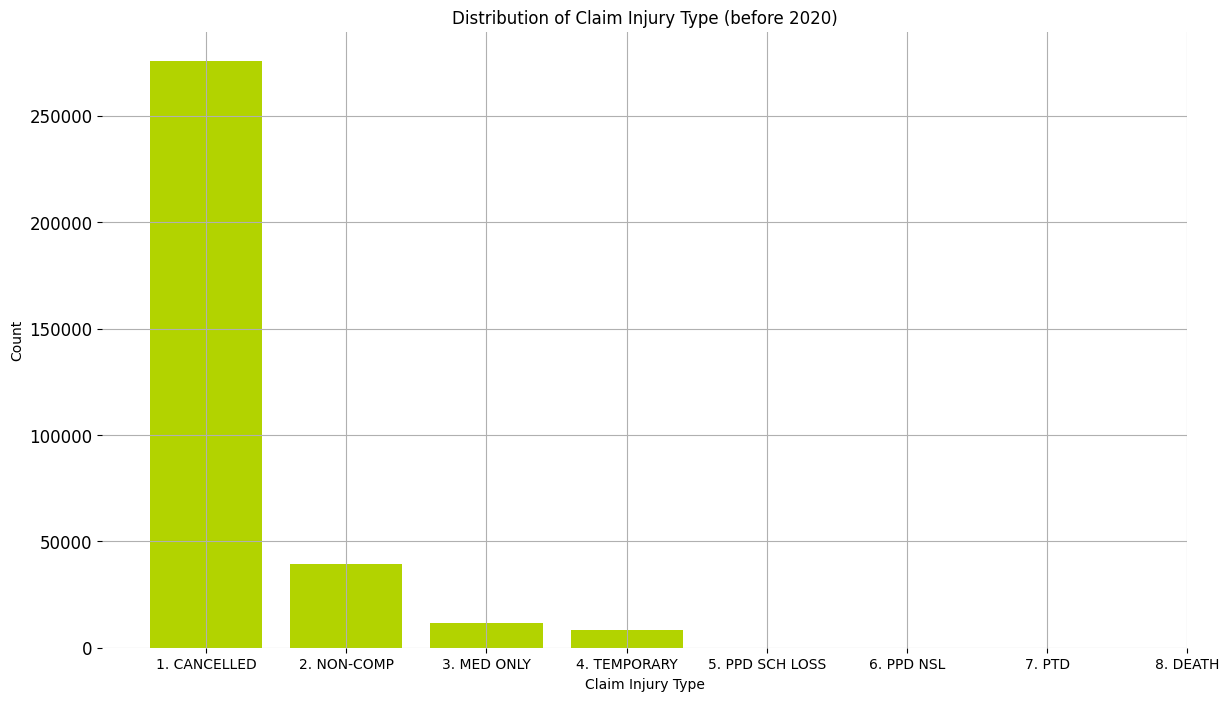

In [180]:
no_wage = df_train[df_train['Average Weekly Wage'] == 0]
no_wage_counts = no_wage['Claim Injury Type'].value_counts()
plt.figure(figsize=(14, 8))
bars = plt.bar(no_wage_counts.index, no_wage_counts.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type (before 2020)')
plt.yticks(fontsize=12)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()